# **ML-проект для British Airways Internship**

In [115]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from matplotlib import rcParams
from sklearn.decomposition import PCA
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

rcParams['figure.figsize']=12,6

In [116]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0



- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking



# EDA

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [118]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [119]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [120]:
df.duplicated().sum()

719

In [121]:
df.drop_duplicates(inplace=True)

# Preprocessing

**В датафрейме присутствуют категориальные колонки, которые можно закодировать**

**Сделаем это:**

In [122]:
df.booking_origin.unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [123]:
continent_dict = {
    'New Zealand': 'Oceania',
    'India': 'Asia',
    'United Kingdom': 'Europe',
    'China': 'Asia',
    'South Korea': 'Asia',
    'Japan': 'Asia',
    'Malaysia': 'Asia',
    'Singapore': 'Asia',
    'Switzerland': 'Europe',
    'Germany': 'Europe',
    'Indonesia': 'Asia',
    'Czech Republic': 'Europe',
    'Vietnam': 'Asia',
    'Thailand': 'Asia',
    'Spain': 'Europe',
    'Romania': 'Europe',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Slovakia': 'Europe',
    'United Arab Emirates': 'Asia',
    'Tonga': 'Oceania',
    'Réunion': 'Africa',
    '(not set)': 'NAN',
    'Saudi Arabia': 'Asia',
    'Netherlands': 'Europe',
    'Qatar': 'Asia',
    'Hong Kong': 'Asia',
    'Philippines': 'Asia',
    'Sri Lanka': 'Asia',
    'France': 'Europe',
    'Croatia': 'Europe',
    'United States': 'North America',
    'Laos': 'Asia',
    'Hungary': 'Europe',
    'Portugal': 'Europe',
    'Cyprus': 'Europe',
    'Australia': 'Oceania',
    'Cambodia': 'Asia',
    'Poland': 'Europe',
    'Belgium': 'Europe',
    'Oman': 'Asia',
    'Bangladesh': 'Asia',
    'Kazakhstan': 'Asia',
    'Brazil': 'South America',
    'Turkey': 'Europe',
    'Kenya': 'Africa',
    'Taiwan': 'Asia',
    'Brunei': 'Asia',
    'Chile': 'South America',
    'Bulgaria': 'Europe',
    'Ukraine': 'Europe',
    'Denmark': 'Europe',
    'Colombia': 'South America',
    'Iran': 'Asia',
    'Bahrain': 'Asia',
    'Solomon Islands': 'Oceania',
    'Slovenia': 'Europe',
    'Mauritius': 'Africa',
    'Nepal': 'Asia',
    'Russia': 'Asia',
    'Kuwait': 'Asia',
    'Mexico': 'North America',
    'Sweden': 'Europe',
    'Austria': 'Europe',
    'Lebanon': 'Asia',
    'Jordan': 'Asia',
    'Greece': 'Europe',
    'Mongolia': 'Asia',
    'Canada': 'North America',
    'Tanzania': 'Africa',
    'Peru': 'South America',
    'Timor-Leste': 'Asia',
    'Argentina': 'South America',
    'New Caledonia': 'Oceania',
    'Macau': 'Asia',
    'Myanmar (Burma)': 'Asia',
    'Norway': 'Europe',
    'Panama': 'North America',
    'Bhutan': 'Asia',
    'Norfolk Island': 'NAN',
    'Finland': 'Europe',
    'Nicaragua': 'North America',
    'Maldives': 'Asia',
    'Egypt': 'Africa',
    'Israel': 'Asia',
    'Tunisia': 'Africa',
    'South Africa': 'Africa',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America',
    'Estonia': 'Europe',
    'Seychelles': 'Africa',
    'Afghanistan': 'Asia',
    'Guam': 'Oceania',
    'Czechia': 'Europe',
    'Malta': 'Europe',
    'Vanuatu': 'Oceania',
    'Belarus': 'Europe',
    'Pakistan': 'Asia',
    'Iraq': 'Asia',
    'Ghana': 'Africa',
    'Gibraltar': 'Europe',
    'Guatemala': 'North America',
    'Algeria': 'Africa',
    'Svalbard & Jan Mayen': 'NAN'
}

In [124]:
df.booking_origin = df.booking_origin.map(continent_dict)

In [125]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [126]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [127]:
df = pd.concat([df, pd.get_dummies(df.sales_channel)], axis=1)
df = pd.concat([df, pd.get_dummies(df.trip_type)], axis=1)
df.drop(columns='trip_type', inplace=True)
df.drop(columns='route', inplace=True)
df.drop(columns='sales_channel', inplace=True)
df = pd.concat([df, pd.get_dummies(df.booking_origin)], axis=1)
df.drop(columns='booking_origin', inplace=True)

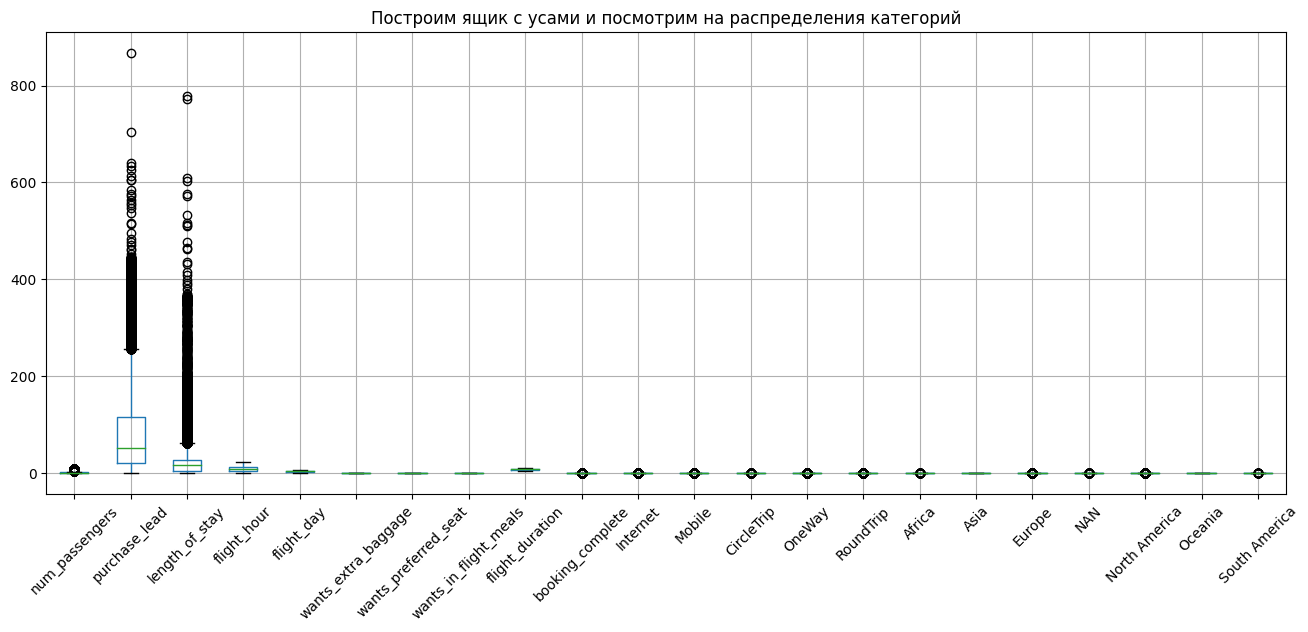

In [128]:
plt.figure(figsize=(16,6))
df.boxplot()
plt.xticks(rotation=45)
plt.title('Построим ящик с усами и посмотрим на распределения категорий')
plt.show()

Еще с применения метода *info()* можно было заметить, что в данных много выбросов.

Эмпирически это проверив, я пришел к следующим действиям

In [129]:
df_no = df.drop(columns='purchase_lead')
df_no = df_no.loc[df.length_of_stay<50]
df_no = df_no.drop(columns='length_of_stay')
df_no = df_no.loc[df.num_passengers<=4]

Количество срок сократилось примерно на 15% - не так критично, как могло бы быть, поэтому оставляем так

In [130]:
df_no.shape

(42992, 20)

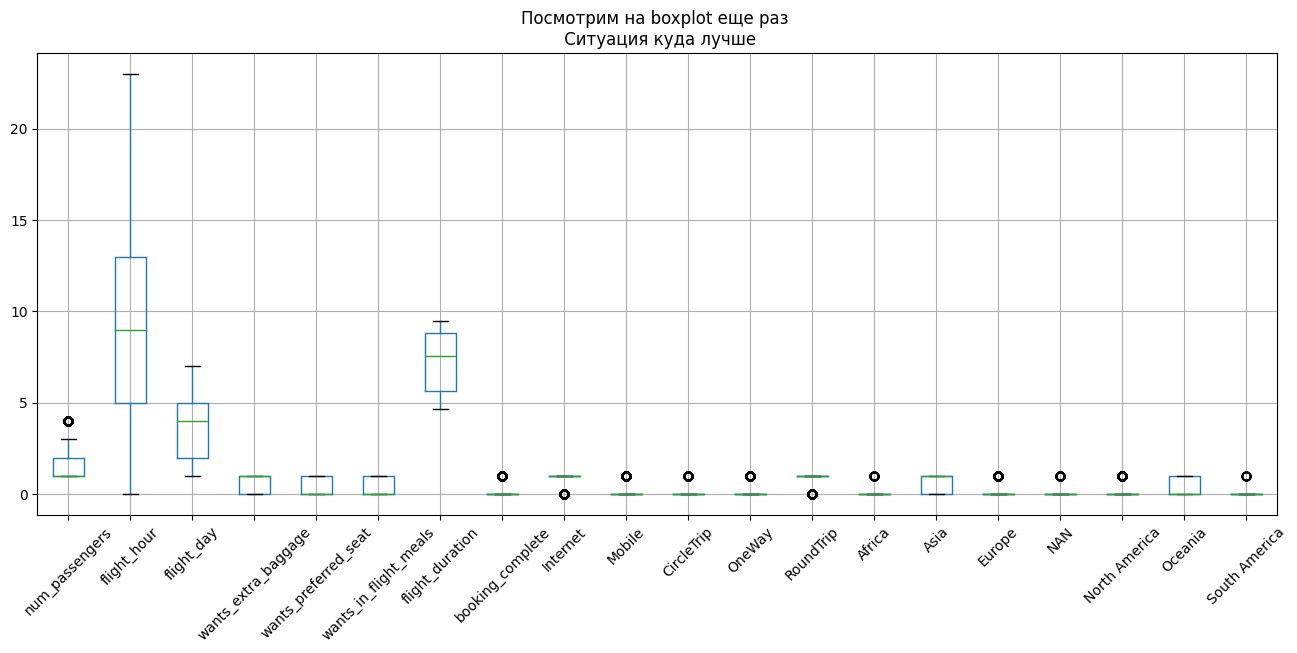

In [131]:
plt.figure(figsize=(16,6))
df_no.boxplot()
plt.xticks(rotation=45)
plt.title('Посмотрим на boxplot еще раз \n Ситуация куда лучше')
plt.show()

Посмотрим на баланс классов


In [132]:
len(df_no.booking_complete)/sum(df_no.booking_complete)

6.663360198388097

Искусствено сбалансируем их, подогнав количество класса "0" к классу "1"

In [133]:
df_no = pd.concat([df_no.loc[df_no.booking_complete==1], df_no.loc[df_no.booking_complete==0].sample(len(df_no.loc[df_no.booking_complete==1]))] )

In [134]:
df_no.shape

(12904, 20)

Объем данных все еще удовлетворителен для построения модели машинного обучения, хотя и значительно сократился

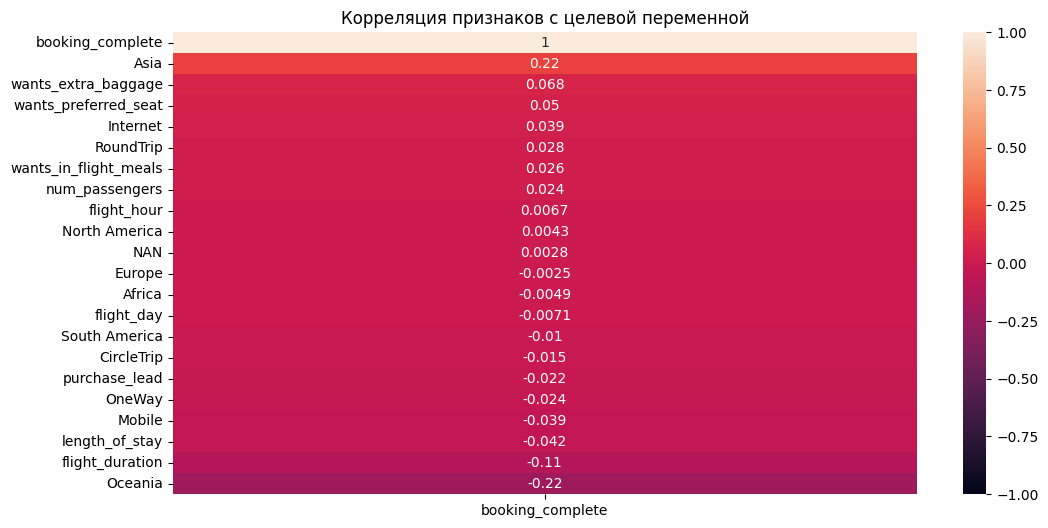

In [135]:
sns.heatmap(df.corr()[['booking_complete']].sort_values(by='booking_complete', ascending=False), vmin=-1, vmax=1,annot=True)
plt.title('Корреляция признаков с целевой переменной')
plt.show()

# Построение моделей

In [136]:
X_train, X_test, y_train, y_test = train_test_split(df_no.drop(columns='booking_complete'), df_no.booking_complete, test_size=0.4)

Нормализуем значения

In [137]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Я слышал, что многие авиакомпании продают на рейс больше билетов, чем может вместить самолет ввиду того, что часть пассажиров отказывается в последний момент либо не приходит. Интерпретировав целевой параметр *booking_complete* как подтверждение брони - факт, что человек явился на рейс, метрикой качества будет служить *precision* - сколько предсказанных положительно результатов действительно будут такими

**1. Случайный лес с настройкой гиперпараметров**

In [138]:
pars = {'n_estimators':[50, 100,300, 500],'criterion':[ "gini", "entropy", "log_loss"],'oob_score':[True, False], 'max_depth':[ 5, 10, 20, 15], 'min_samples_split':[2, 4,6], 'min_samples_leaf':[ 1, 2,5, 10, 15, 20, 25], 'random_state':[42]}
rf1 = RandomForestClassifier()
gs = RandomizedSearchCV(rf1, pars)
gs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 20, 15],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20, 25],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [50, 100, 300, 500],
                                        'oob_score': [True, False],
                                        'random_state': [42]})

In [139]:
gs.best_params_

{'random_state': 42,
 'oob_score': True,
 'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 15,
 'criterion': 'log_loss'}

In [140]:
ypr_rf1 = gs.predict(X_test)

In [141]:
print(recall_score(y_test, ypr_rf1))
print(precision_score(y_test, ypr_rf1))
print(accuracy_score(y_test, ypr_rf1))

0.7908320493066255
0.646817895400126
0.677644323905463


**2. Дерево решений с подбором гиперпараметров**

In [142]:
pars_dt = {'criterion':["gini", "entropy", "log_loss"], 'max_depth':[ 5, 10, 20, 15], 'min_samples_split':[2, 4,6], 'min_samples_leaf':[ 15, 20, 25,30, 35, 40, 45, 50, 55], 'random_state':[42]}
dt1 = DecisionTreeClassifier()
gs_dt1 = GridSearchCV(dt1, pars_dt)
gs_dt1.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 20, 15],
                         'min_samples_leaf': [15, 20, 25, 30, 35, 40, 45, 50,
                                              55],
                         'min_samples_split': [2, 4, 6], 'random_state': [42]})

In [143]:
gs_dt1.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'random_state': 42}

In [144]:
ypr_dt1 = gs_dt1.predict(X_test)

In [145]:
print(recall_score(y_test, ypr_dt1))
print(precision_score(y_test, ypr_dt1))
print(accuracy_score(y_test, ypr_dt1))

0.6752696456086287
0.6602636534839925
0.6619527314994188


**3. Логистическая регрессия**

In [146]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
ypr_lr = lr.predict(X_test)
print(recall_score(y_test, ypr_lr))
print(precision_score(y_test, ypr_lr))
print(accuracy_score(y_test, ypr_lr))

0.8023882896764253
0.6327460510328068
0.6664083688492832


**4. Градиентный бустинг**

In [147]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
ypr_xgb = xgb.predict(X_test)
print(recall_score(y_test, ypr_xgb))
print(precision_score(y_test, ypr_xgb))
print(accuracy_score(y_test, ypr_xgb))

0.6833590138674884
0.6560650887573964
0.6605966679581557


**5. К-ближайших соседей**

In [148]:
knc = KNeighborsClassifier(n_neighbors=20)
knc.fit(X_train, y_train)
yr_knc = knc.predict(X_test)
print(recall_score(y_test, yr_knc))
print(precision_score(y_test, yr_knc))
print(accuracy_score(y_test, yr_knc))

0.6459938366718028
0.648491879350348
0.6458736923672995


**6. Feature importances для случайного леса**

In [149]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
ypr = rf.predict(X_test)
print(recall_score(y_test, ypr))
print(precision_score(y_test, ypr))
print(accuracy_score(y_test, ypr))

0.6413713405238829
0.6321184510250569
0.6319256102285936


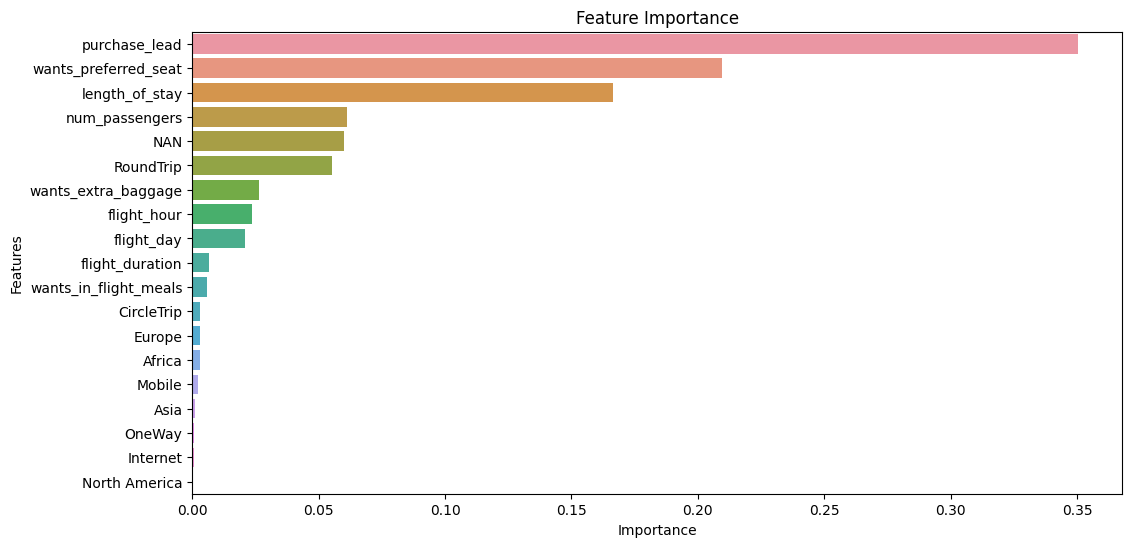

In [150]:
feats = {}
for feature, importance in zip(df.drop(columns='booking_complete').columns, rf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

fig, ax = plt.subplots()
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances)
plt.xlabel('Importance')
plt.ylabel('Features')

plt.title('Feature Importance')
plt.show()

In [151]:
df_feat = df_no.copy()
df_feat.drop(columns=['North America', 'OneWay', 'Internet', 'Asia', 'Mobile', 'CircleTrip', 'Africa', 'Europe'], inplace=True)

In [152]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_feat.drop(columns='booking_complete'), df_feat.booking_complete, test_size=0.4)

In [153]:
sc1 = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

In [154]:
rf_feat = RandomForestClassifier()
rf_feat.fit(X_train1, y_train1)
ypr_feat = rf_feat.predict(X_test1)
print(recall_score(y_test1, ypr_feat))
print(precision_score(y_test1, ypr_feat))
print(accuracy_score(y_test1, ypr_feat))

0.6237354085603113
0.6008245877061469
0.6063541263076327


Попробуем применить метод главных компонент

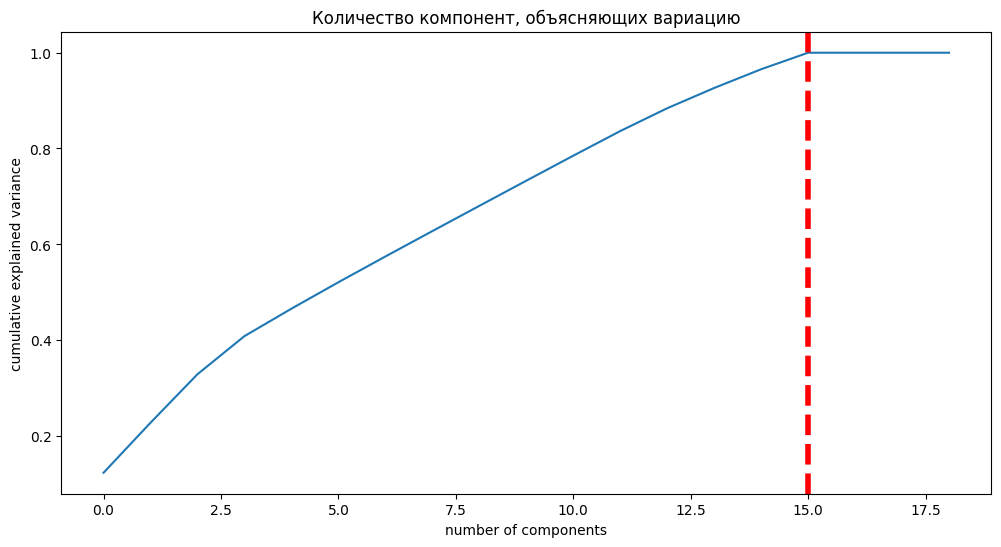

In [155]:
pca_test = PCA(n_components=X_train.shape[1])
pca_test.fit(X_train)

plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=15, ymin=0, ymax=1)
plt.title('Количество компонент, объясняющих вариацию')
plt.show()

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr

In [156]:
pca = PCA(n_components=15)
pca.fit(X_train)
X_train_scaled_pca = pca.transform(X_train)
X_test_scaled_pca = pca.transform(X_test)

In [157]:
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_,columns=df_no.drop(columns='booking_complete').columns, index=pca_dims)
pca_test_df.head(15).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9,PCA Component 10,PCA Component 11,PCA Component 12,PCA Component 13,PCA Component 14
num_passengers,-0.080229,0.002909,-0.079225,-0.291103,-0.032678,-0.042073,0.380878,-0.038024,0.095877,-0.271700,-0.396656,0.517038,0.010005,0.388280,0.307599
flight_hour,-0.008508,0.038236,0.005306,-0.072194,0.658153,0.214486,0.100926,-0.079675,-0.049404,-0.072078,-0.030345,-0.122558,-0.687482,0.009035,0.024012
flight_day,-0.031963,0.010260,0.066627,0.057472,0.117362,0.265442,0.254237,0.369064,0.307879,0.175335,-0.585538,-0.407844,0.240956,-0.105717,-0.042597
wants_extra_baggage,0.057829,-0.037224,-0.015286,-0.509177,-0.072678,-0.105675,0.142403,0.017082,-0.008040,-0.098479,-0.119725,0.212981,-0.083965,-0.605004,-0.495346
wants_preferred_seat,0.060886,-0.069361,0.116132,-0.561028,0.022939,-0.046513,-0.109927,0.006898,0.082344,0.053322,0.160486,-0.230515,0.103294,-0.035103,0.293219
wants_in_flight_meals,0.125164,-0.081209,0.129972,-0.520886,0.024694,0.026923,-0.126053,0.035144,0.014012,0.103166,0.127721,-0.282496,0.074871,0.269358,0.136728
flight_duration,0.317352,-0.081337,0.220398,-0.050977,-0.038749,0.157169,-0.114944,0.009830,0.043167,0.004670,-0.059834,0.067215,-0.027606,0.558777,-0.654917
Internet,0.327863,-0.152064,-0.601094,-0.017137,0.009101,0.037346,-0.015331,0.015814,0.011646,0.039289,-0.015612,-0.052470,0.007465,0.023547,0.011751
Mobile,-0.327863,0.152064,0.601094,0.017137,-0.009101,-0.037346,0.015331,-0.015814,-0.011646,-0.039289,0.015612,0.052470,-0.007465,-0.023547,-0.011751
CircleTrip,0.119533,0.338796,-0.023653,-0.030225,-0.038090,0.343912,0.508674,-0.247992,-0.256253,-0.214516,0.261417,-0.204541,0.258880,0.002083,-0.064305


In [158]:
rfc23 = RandomForestClassifier()
rfc23.fit(X_train_scaled_pca, y_train)
print(recall_score(y_test, rfc23.predict(X_test_scaled_pca)))
print(precision_score(y_test, rfc23.predict(X_test_scaled_pca)))
print(accuracy_score(y_test, rfc23.predict(X_test_scaled_pca)))

0.6352080123266564
0.6234404536862004
0.6235955056179775


*Feature importances* показало, что количество параметров можно сократить до 15, однако, это никак не повлияло на качество модели

In [159]:
from sklearn.inspection import permutation_importance

r = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

perm = pd.DataFrame(columns=['AVG_importance', 'STD_importance'], index=[i for i in df_no.drop(columns='booking_complete').columns])
perm.AVG_importance = r.importances_mean

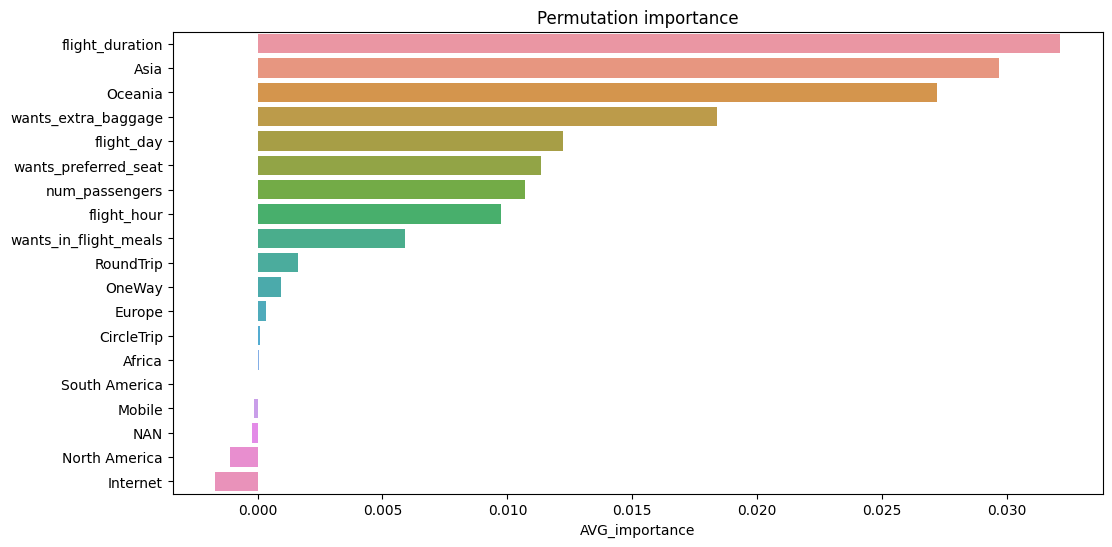

In [160]:
perm = perm.sort_values(by='AVG_importance', ascending=False)
sns.barplot(x=perm['AVG_importance'], y=perm.index, data=perm)
plt.title('Permutation importance')
plt.show()

In [161]:
df_perm = df_no.copy()
df_perm.drop(columns=['CircleTrip', 'NAN', 'South America', 'Africa', 'Europe', 'wants_in_flight_meals'], inplace=True)

In [162]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_perm.drop(columns='booking_complete'), df_perm.booking_complete, test_size=0.4)

In [163]:
sc2 = StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

In [164]:
rf_perm = RandomForestClassifier()
rf_perm.fit(X_train2, y_train2)
ypr_perm = rf_perm.predict(X_test2)
print(recall_score(y_test2, ypr_perm))
print(precision_score(y_test2, ypr_perm))
print(accuracy_score(y_test2, ypr_perm))

0.618111753371869
0.6050546963410034
0.6051917861294072


*Permutation importance* показал примерно такой же результат, как и остальные модели

**7. Нейронная сеть**

In [165]:
from tensorflow.keras import metrics

In [166]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE: define the model given in the diagram
model = keras.Sequential([
    layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),

])


In [167]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['binary_accuracy'])

Epoch 1/200
16/16 [==============================] - 2s 32ms/step - loss: 0.7728 - binary_accuracy: 0.6032 - val_loss: 0.6717 - val_binary_accuracy: 0.5643
Epoch 2/200
16/16 [==============================] - 0s 20ms/step - loss: 0.7160 - binary_accuracy: 0.6151 - val_loss: 0.6645 - val_binary_accuracy: 0.5769
Epoch 3/200
16/16 [==============================] - 0s 16ms/step - loss: 0.7015 - binary_accuracy: 0.6294 - val_loss: 0.6666 - val_binary_accuracy: 0.5498
Epoch 4/200
16/16 [==============================] - 0s 16ms/step - loss: 0.6726 - binary_accuracy: 0.6403 - val_loss: 0.6605 - val_binary_accuracy: 0.5633
Epoch 5/200
16/16 [==============================] - 0s 15ms/step - loss: 0.6723 - binary_accuracy: 0.6354 - val_loss: 0.6596 - val_binary_accuracy: 0.5771
Epoch 6/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6609 - binary_accuracy: 0.6492 - val_loss: 0.6527 - val_binary_accuracy: 0.6036
Epoch 7/200
16/16 [==============================] - 0s 16ms/ste

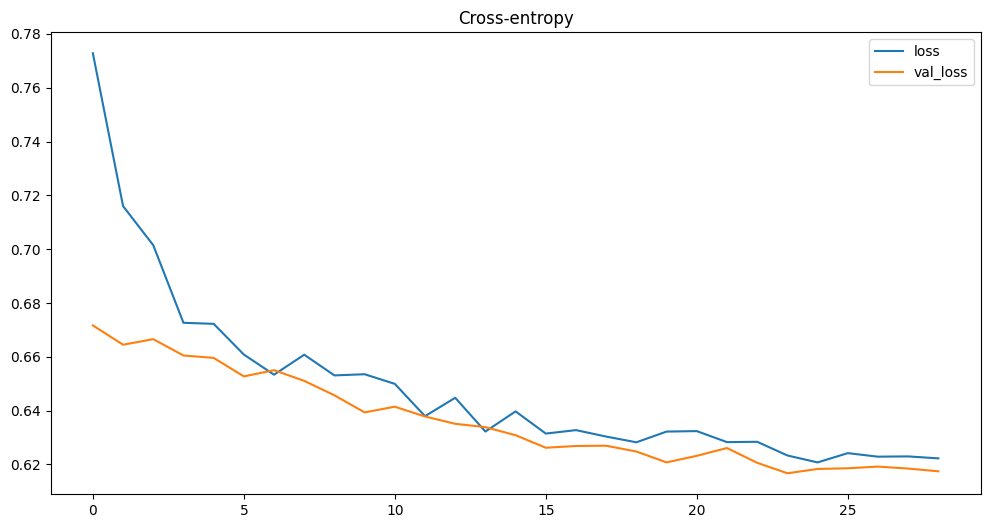

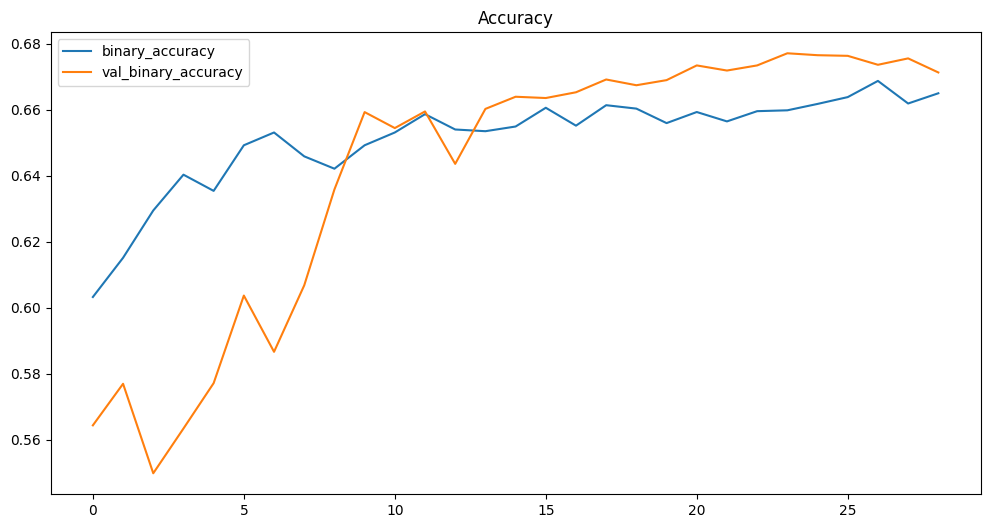

In [168]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
plt.show()

In [169]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.6167 - binary_accuracy: 0.6771


[0.6167321801185608, 0.6770631670951843]

# Выводы

1. Лучше всего из построенных моделей по метрике *precision* показала модель дерева решений и нейронной сети, по метрике *recall* - логистическая регрессия, по *accuracy* - случайного леса с подобранными гиперпараметрами.
2. Все модели вышли на плато - 0.65, дальше повысить точность не получается даже настройкой гиперпараметров. Дополнительно строились модели с измененными признаками, но и они не показали хороших результатов.
3. Вероятно, проблема в самих данных: признаки мало объясняют целевую переменную, поэтому следует поработать и заменить их на более подходящее.

Модель не готова к применению на практике